In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
df = pd.read_csv("../data/spec_data.csv", sep="|", skipinitialspace=True, on_bad_lines="warn")

df.columns = [col.strip() for col  in df.columns]

df

,Test_Sponsor,SPEC_License,Test_Method,Tested_By,Test_Location,Test_Date,Hardware_Availability,Software_Availability,Publication,System_Source,...,SW_JVMMaxHeapMB,SW_JVMAddressBits,SW_BootFirmwareVersion,SW_MgmtFirmwareVersion,SW_WorkloadVersion,SW_DirectorLocation,SW_Others,SUT_BIOS,SUT_Firmware,SUT_Notes
0,IBM Corporation ...,11,Single Node,IBM Corporation ...,"Nankang, Taipei, Taiwan","Mar 10, 2010",Jun-2010,Oct-2009,"Apr 7, 2010",Single Supplier,...,1500,64,Y4E145V,YUOO57G,SSJ 1.2.6,Controller,None ...,See SUT Note ...,None ...,;;;Each JVM instance was affinitized four thre...
1,"Huawei Technologies Co., Ltd ...",3175,Single Node,"Huawei Technologies Co., Ltd ...","Shenzhen, Guangdong, China","Feb 23, 2012",Mar-2012,Dec-2011,"Mar 28, 2012",Single Supplier,...,2048,64,V009,3.00,SSJ 1.2.9,Controller,IBM Websphere application server V7.0 for Wind...,;;;Hardware prefetcher -disabled.;;;Adjacent C...,none ...,;;;The test was started via Remote Desktop.;;;...
2,"Huawei Technologies Co., Ltd ...",3175,Single Node,"Huawei Technologies Co., Ltd ...","Shenzhen, Guangdong, China","Oct 12, 2012",Aug-2012,Jun-2012,"Oct 31, 2012",Single Supplier,...,1500,64,V030,3.02,SSJ 1.2.9,Controller,IBM WebSphere Application Server V7.0 for Wind...,;;;Hardware prefetcher -disabled.;;;Adjacent C...,none ...,;;;The test was started via Remote Desktop.;;;...
3,Inspur Corporation ...,3358,Single Node,Inspur Corporation ...,"JINAN, CHINA","Apr 9, 2018",Sep-2017,Jan-2015,"May 23, 2018",Single Supplier,...,1550,64,3.0.4,3.10,SSJ 1.2.10,Controller,None ...,";;;Set ""Hardware Prefetcher = Disabled"" in BIO...",none ...,";;;Set ""Turn off hard disk after = 1 Minute"" i..."
4,"Huawei Technologies Co., Ltd ...",3175,Single Node,"Huawei Technologies Co., Ltd ...","Shenzhen, Guangdong, China","Apr 27, 2012",Mar-2012,Dec-2011,"May 16, 2012",Single Supplier,...,1500,64,V014,3.02,SSJ 1.2.9,Controller,None ...,;;;Hardware prefetcher -disabled.;;;Adjacent C...,none ...,;;;The test was started via Remote Desktop.;;;...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,Hewlett Packard Enterprise ...,3,Single Node,Hewlett Packard Enterprise ...,"Houston, TX, USA","Jul 16, 2019",Aug-2019,Jun-2019,"Aug 7, 2019",Single Supplier,...,3740,64,A40 v2.00 (07/15/2019),1.43 May 23 2019,SSJ 1.2.10,Controller,"Microsoft KB4504369, KB4503327, KB900088 ...",BIOS Platform Configuration (RBSU):;;;HPE Work...,See SUT Notes ...,;;;Benchmark started via Windows Remote Deskto...
615,Hewlett Packard Enterprise ...,3,Single Node,Hewlett Packard Enterprise ...,"Houston, TX, USA","Sep 8, 2015",Nov-2015,Jun-2013,"Jan 7, 2016",Single Supplier,...,975,64,P89 1.50 07/20/2015,2.30 pass 22 Jun 25 2015,SSJ 1.2.10,Controller,"IBM WebSphere Application Server V8.5.0.0, Mic...",<br>System Configuration -> BIOS/Platform Conf...,See SUT Notes ...,";;;Using the local security settings console, ..."
616,Lenovo Global Technology ...,9017,Single Node,Lenovo Global Technology ...,"Beijing, China","Mar 3, 2020",Jun-2020,Dec-2019,"May 11, 2020",Single Supplier,...,1700,64,d8e105f-1.00,d8bt05s-2.00,SSJ 1.2.10,Controller,None ...,<UL>;;;Choose Operating Mode: Custom Mode;;;Me...,none ...,;;;Benchmark started via ssh;;;Each JVM instan...
617,"New H3C Technologies Co., Ltd. ...",9066,Single Node,"New H3C Technologies Co., Ltd. ...","Hangzhou, Zhejiang, China","Apr 15, 2019",Dec-2018,Dec-2018,"May 8, 2019",Single Supplier,...,25000,64,2.00.14P02,1.11.21P01,SSJ 1.2.10,Controller,None ...,;;;Hardware Prefetcher: disabled;;;Adjacent Ca...,none ...,;;;Each JVM instance was bound to 28 logical p...


In [3]:
def extract_cores(text):
  if pd.isna(text): return np.nan
  match = re.search(r'(\d+) cores?', str(text))
  
  return int(match.group(1)) if match else np.nan

df['Total_Cores'] = df['HW_CPUsEnabled'].apply(extract_cores)

In [ ]:
# Load levels to long format
load_cols = ['100', '90', '80', '70', '60', '50', '40', '30', '20', '10']
power_cols = [f"{load}_AvgPower" for load in load_cols]
perf_cols =  [f"{load}_PerfPowerRatio" for load in load_cols]
ops_cols =  [f"{load}_ssj_ops" for load in load_cols]

power_cols

In [13]:
long_df = pd.melt(
  df,
  id_vars=['HW_Vendor', 'HW_Model', 'Total_Cores', 'ActiveIdle', 'HW_CPUName'],
  value_vars=power_cols + ['ActiveIdle'],
  var_name='Load_Level',
  value_name='AvgPower'
)

long_df

,HW_Vendor,HW_Model,Total_Cores,ActiveIdle,HW_CPUName,Load_Level,AvgPower
0,IBM Corporation ...,IBM System x3400 M3 ...,12,69.2,Intel Xeon X5670 ...,100_AvgPower,258.0
1,"Huawei Technologies Co., Ltd ...",RH2288 V2 ...,16,59.7,Intel Xeon E5-2660 ...,100_AvgPower,257.0
2,"Huawei Technologies Co., Ltd ...",RH2288 V2 ...,16,66.8,Intel Xeon E5-2680 ...,100_AvgPower,236.0
3,Inspur Corporation ...,Inspur NF5280M5 ...,56,49.4,Intel Xeon Platinum 8176 ...,100_AvgPower,454.0
4,"Huawei Technologies Co., Ltd ...",RH2288 V2 ...,16,54.8,Intel Xeon E5-2670 ...,100_AvgPower,279.0
...,...,...,...,...,...,...,...
6185,Hewlett Packard Enterprise ...,ProLiant DL385 Gen10 ...,128,111.0,AMD EPYC 7702 2.0 GHz ...,10_AvgPower,197.0
6186,Hewlett Packard Enterprise ...,ProLiant DL360 Gen9 ...,36,45.0,Intel Xeon E5-2699 v3 2.30 GHz ...,10_AvgPower,83.7
6187,Lenovo Global Technology ...,Think System SR645 ...,128,99.5,AMD EPYC 7742 2.25GHz ...,10_AvgPower,183.0
6188,"New H3C Technologies Co., Ltd. ...",H3C UniServer R6700 G3 ...,112,95.5,Intel Xeon Platinum 8280L 2.70GHz ...,10_AvgPower,242.0


In [14]:
long_df['Load_Level'] = long_df['Load_Level'].replace('ActiveIdle', '0')
long_df['Load_Level'] = long_df['Load_Level'].replace(r'_AvgPower|ActiveIdle', '', regex=True)
long_df['Load_Level'] = pd.to_numeric(long_df['Load_Level'], errors='coerce')
long_df = long_df.dropna(subset=['AvgPower', 'Load_Level'])

long_df

,HW_Vendor,HW_Model,Total_Cores,ActiveIdle,HW_CPUName,Load_Level,AvgPower
0,IBM Corporation ...,IBM System x3400 M3 ...,12,69.2,Intel Xeon X5670 ...,100,258.0
1,"Huawei Technologies Co., Ltd ...",RH2288 V2 ...,16,59.7,Intel Xeon E5-2660 ...,100,257.0
2,"Huawei Technologies Co., Ltd ...",RH2288 V2 ...,16,66.8,Intel Xeon E5-2680 ...,100,236.0
3,Inspur Corporation ...,Inspur NF5280M5 ...,56,49.4,Intel Xeon Platinum 8176 ...,100,454.0
4,"Huawei Technologies Co., Ltd ...",RH2288 V2 ...,16,54.8,Intel Xeon E5-2670 ...,100,279.0
...,...,...,...,...,...,...,...
6185,Hewlett Packard Enterprise ...,ProLiant DL385 Gen10 ...,128,111.0,AMD EPYC 7702 2.0 GHz ...,10,197.0
6186,Hewlett Packard Enterprise ...,ProLiant DL360 Gen9 ...,36,45.0,Intel Xeon E5-2699 v3 2.30 GHz ...,10,83.7
6187,Lenovo Global Technology ...,Think System SR645 ...,128,99.5,AMD EPYC 7742 2.25GHz ...,10,183.0
6188,"New H3C Technologies Co., Ltd. ...",H3C UniServer R6700 G3 ...,112,95.5,Intel Xeon Platinum 8280L 2.70GHz ...,10,242.0


In [15]:
perf_df = pd.melt(df, value_vars=perf_cols, var_name='Load_Level', value_name='PerfPowerRatio')
perf_df['Load_Level'] = perf_df['Load_Level'].str.replace('_PerfPowerRatio', '', regex=True)
perf_df['Load_Level'] = pd.to_numeric(perf_df['Load_Level'])

perf_df

,Load_Level,PerfPowerRatio
0,100,3550.0
1,100,4980.0
2,100,6092.0
3,100,12825.0
4,100,4993.0
...,...,...
6185,10,5420.0
6186,10,3765.0
6187,10,6583.0
6188,10,4993.0


In [ ]:
# Merge perf_colums to long_df
long_df = long_df.merge(perf_df[['PerfPowerRatio']], left_index=True, right_index=True, how="left")

long_df

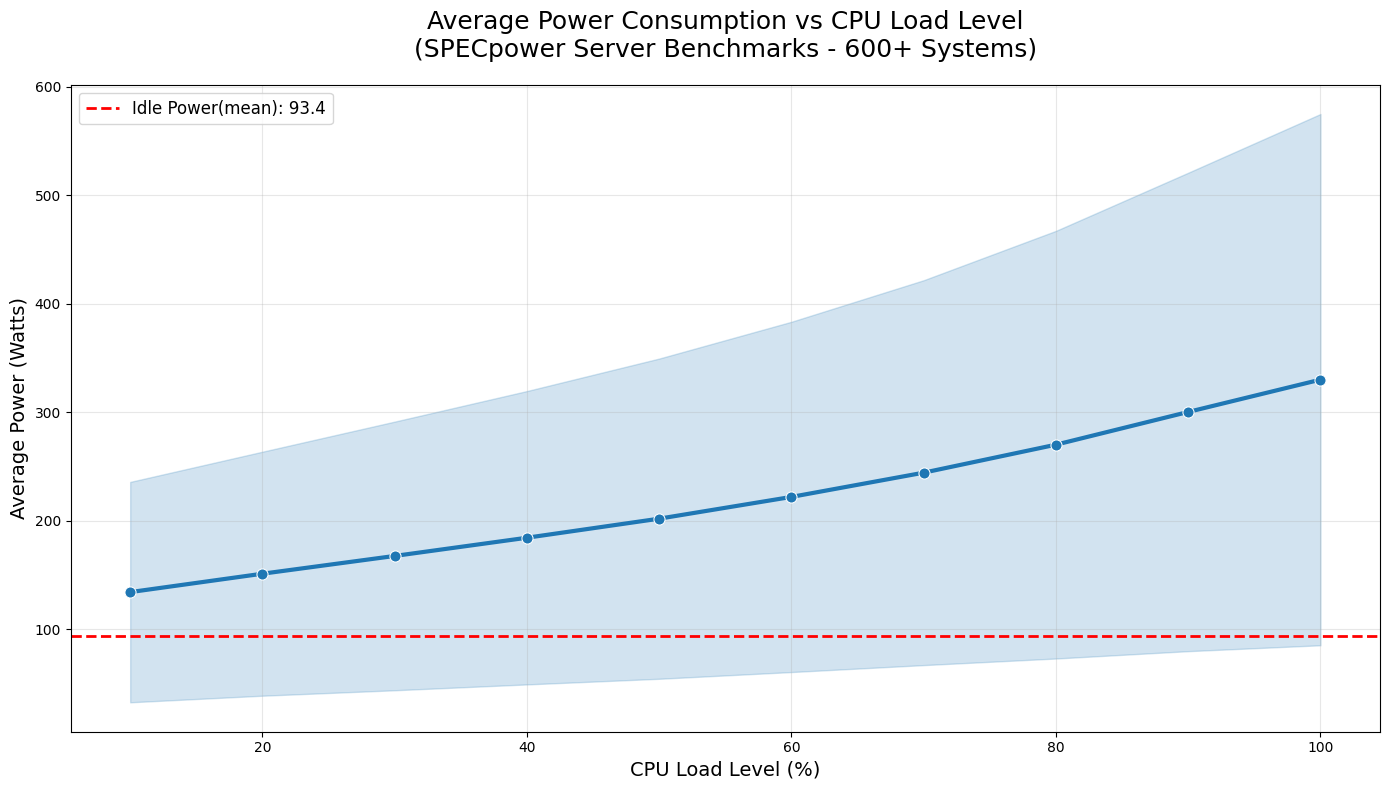

In [22]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=long_df, x='Load_Level', y='AvgPower', estimator='mean', errorbar='sd', linewidth=3, marker='o', markersize=8)

idle_mean = df['ActiveIdle'].mean()
plt.axhline(idle_mean, color='red', linestyle='--', linewidth=2, label=f'Idle Power(mean): {idle_mean:.1f}')

plt.title('Average Power Consumption vs CPU Load Level\n(SPECpower Server Benchmarks - 600+ Systems)', fontsize=18, pad=20)
plt.xlabel('CPU Load Level (%)', fontsize=14)
plt.ylabel('Average Power (Watts)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()